## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# sklearn - preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Evalute
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# sklearn - preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Evalute
from sklearn.metrics import mean_squared_error,r2_score

## Read Dataset

In [3]:
df=pd.read_csv("Dataset_Arqueologico_Egipto_Expandido.csv")
df.head()

,Site ID,Latitude,Longitude,Time Period,Material Composition,Script Detected,AI Prediction Score,Human Activity Index,Climate Change Impact,Sonar Radar Detection,Looting Risk (%)
0,EGX-0001,25.979264,33.087532,Periodo Ptolemaico,Caliza,Demótico,66.501482,4.879290,4.338895,77.865637,70.270385
1,EGX-0002,30.328797,35.666532,Primer Período Intermedio,Bronce,Griego,90.026677,9.321455,1.335763,64.012870,11.820312
2,EGX-0003,26.385666,35.623492,Antiguo Reino,Yeso,Copto,73.468803,1.275264,1.869481,75.218011,73.839307
3,EGX-0004,31.207514,35.624005,Periodo Ptolemaico,"Oro, Bronce",Demótico,80.710058,7.114217,4.618617,97.171239,97.790862
4,EGX-0005,24.557906,30.521296,Primer Período Intermedio,"Bronce, Yeso",Jeroglífico,91.950490,2.088763,0.792455,56.020865,6.744584


# EDA

In [4]:
df.shape

(500, 11)

In [5]:
#to determine data
df.dtypes

Site ID                   object
Latitude                 float64
Longitude                float64
Time Period               object
Material Composition      object
Script Detected           object
AI Prediction Score      float64
Human Activity Index     float64
Climate Change Impact    float64
Sonar Radar Detection    float64
Looting Risk (%)         float64
dtype: object

In [6]:
#drop_col
df.drop(columns=['Site ID'], axis=1, inplace=True)

In [7]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Latitude               500 non-null    float64
 1   Longitude              500 non-null    float64
 2   Time Period            500 non-null    object 
 3   Material Composition   500 non-null    object 
 4   Script Detected        500 non-null    object 
 5   AI Prediction Score    500 non-null    float64
 6   Human Activity Index   500 non-null    float64
 7   Climate Change Impact  500 non-null    float64
 8   Sonar Radar Detection  500 non-null    float64
 9   Looting Risk (%)       500 non-null    float64
dtypes: float64(7), object(3)
memory usage: 39.2+ KB


In [8]:
#stats
df.describe()

,Latitude,Longitude,AI Prediction Score,Human Activity Index,Climate Change Impact,Sonar Radar Detection,Looting Risk (%)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,26.691540,30.629743,75.378008,5.447988,2.423549,74.745348,49.510791
std,2.787102,3.289014,14.113304,2.547472,1.446053,14.423351,28.973381
min,22.001905,25.039260,50.097883,1.004914,0.028424,50.122634,0.114832
25%,24.289427,27.680130,63.140358,3.194670,1.161140,62.346278,24.520399
50%,26.693718,30.722745,76.417699,5.383644,2.382876,74.914336,47.515680
75%,29.131354,33.576274,87.188280,7.580597,3.706392,87.413806,75.802533
max,31.580454,35.979450,98.988314,9.887376,4.989610,99.953363,99.857479


In [9]:
# to check if data have null or no
df.isna().sum()

Latitude                 0
Longitude                0
Time Period              0
Material Composition     0
Script Detected          0
AI Prediction Score      0
Human Activity Index     0
Climate Change Impact    0
Sonar Radar Detection    0
Looting Risk (%)         0
dtype: int64

In [10]:
df['Time Period'].value_counts()

Time Period
Imperio Nuevo                 68
Segundo Período Intermedio    63
Primer Período Intermedio     59
Periodo Romano                57
Periodo Ptolemaico            56
Antiguo Reino                 50
Periodo Tardío                50
Imperio Medio                 49
Tercer Período Intermedio     48
Name: count, dtype: int64

In [11]:
df['Script Detected'].value_counts()

Script Detected
Cuneiforme     91
Demótico       87
Copto          87
Griego         82
Jeroglífico    81
Hierático      72
Name: count, dtype: int64

-----------------

## Data Viz

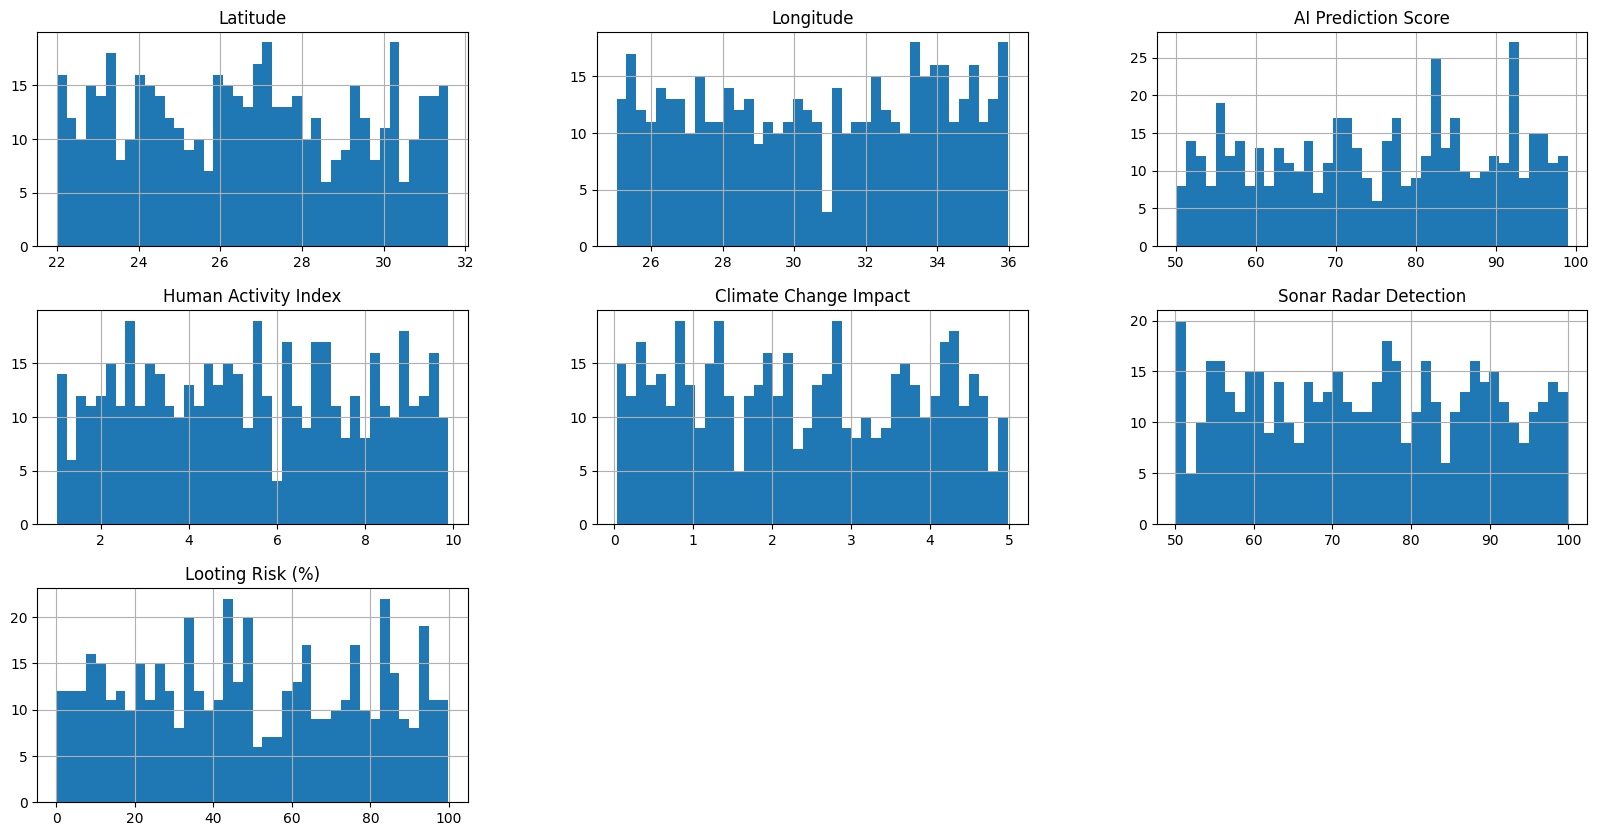

In [12]:
# to see if has Outliers or no
df.hist(bins=40, figsize=(20, 10))  
plt.show()

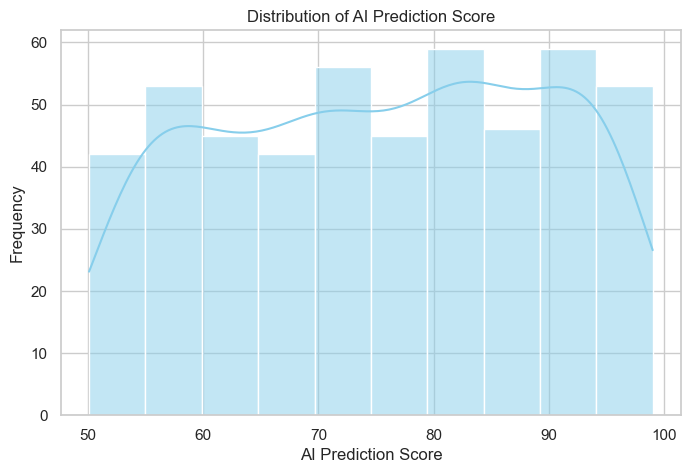

In [13]:
# histplot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(df["AI Prediction Score"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of AI Prediction Score")
plt.xlabel("AI Prediction Score")
plt.ylabel("Frequency")
plt.show()


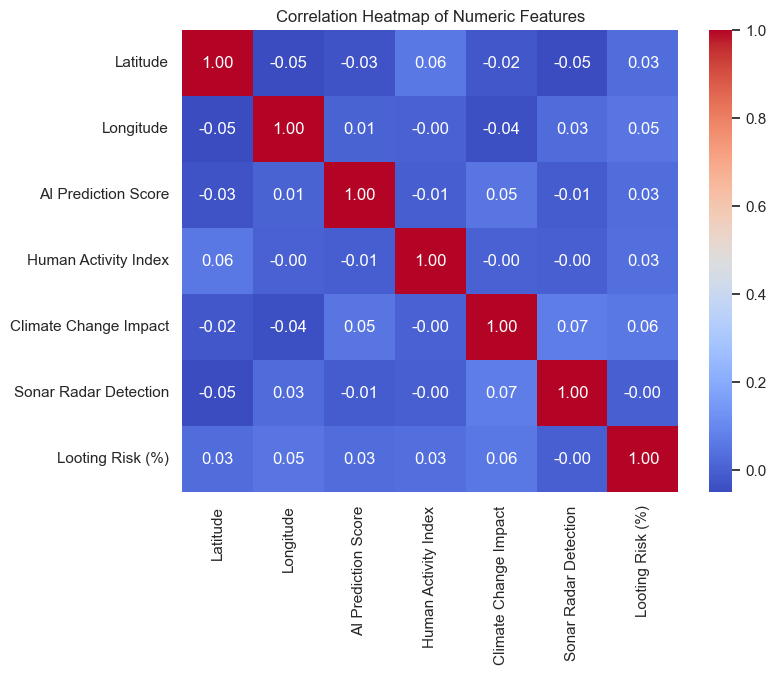

In [14]:
#heatmap
plt.figure(figsize=(8, 6))
numeric_cols = df.select_dtypes(include='number')  
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


C:\Users\KIROO\AppData\Local\Temp\ipykernel_7156\26428585.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Time Period", y="AI Prediction Score", ci=None, palette="viridis")
C:\Users\KIROO\AppData\Local\Temp\ipykernel_7156\26428585.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Time Period", y="AI Prediction Score", ci=None, palette="viridis")


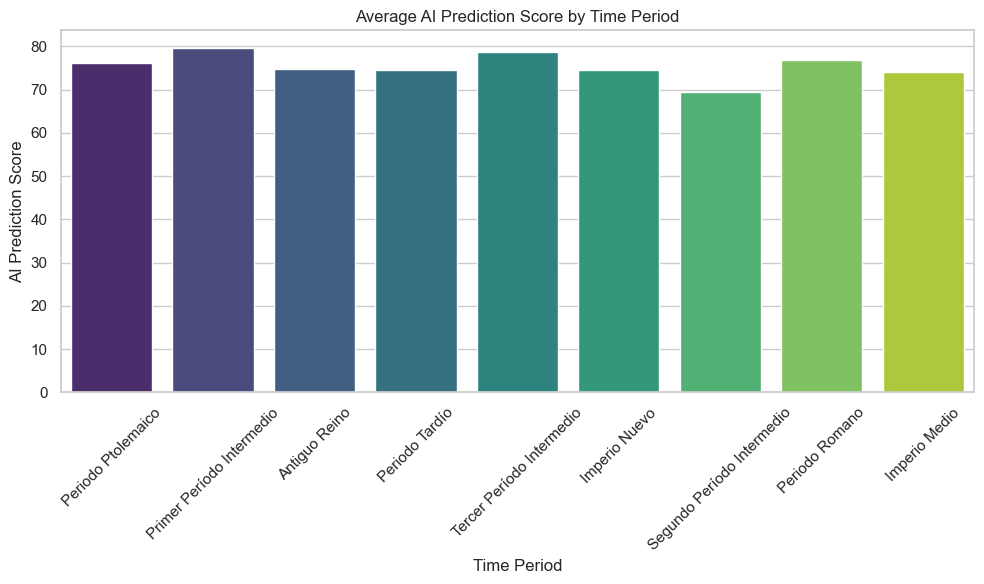

In [15]:
# barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Time Period", y="AI Prediction Score", ci=None, palette="viridis")
plt.title("Average AI Prediction Score by Time Period")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
# scatter_geo
fig = px.scatter_geo(
    df,
    lat="Latitude",
    lon="Longitude",
    color="Looting Risk (%)",
    size="AI Prediction Score",
    hover_name="Time Period",
    projection="natural earth",
    title="Archaeological Site Locations with AI Score and Looting Risk",
    color_continuous_scale="Reds",
    size_max=20
)
fig.update_layout(geo=dict(scope='africa'))  # foucse on africa
fig.show()


C:\Users\KIROO\AppData\Local\Temp\ipykernel_7156\3406970933.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




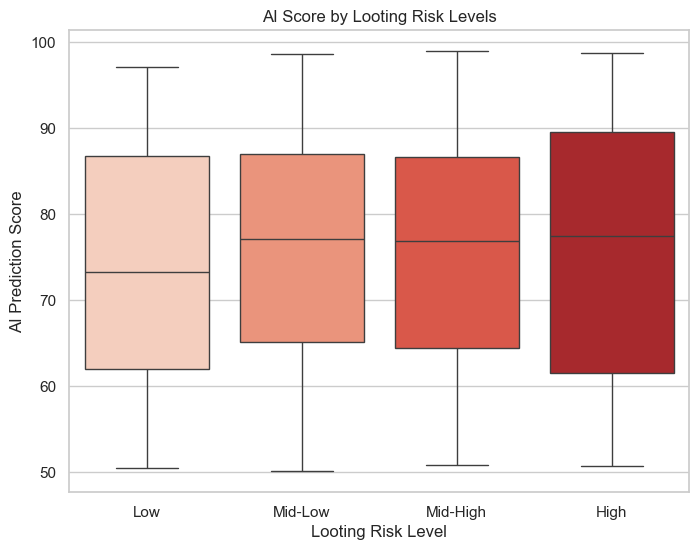

In [17]:
# boxblot
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x=pd.qcut(df["Looting Risk (%)"], q=4, labels=["Low", "Mid-Low", "Mid-High", "High"]),
    y="AI Prediction Score",
    palette="Reds"
)
plt.title("AI Score by Looting Risk Levels")
plt.xlabel("Looting Risk Level")
plt.ylabel("AI Prediction Score")
plt.show()


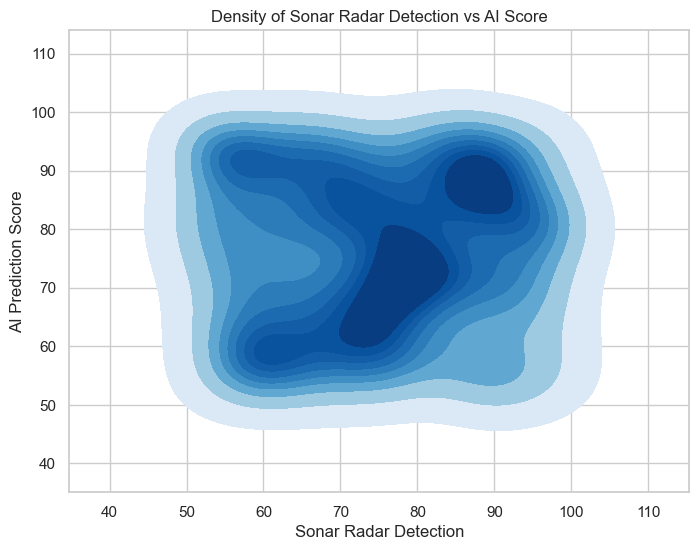

In [18]:
# kdeplot
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df,
    x="Sonar Radar Detection",
    y="AI Prediction Score",
    fill=True,
    cmap="Blues"
)
plt.title("Density of Sonar Radar Detection vs AI Score")
plt.xlabel("Sonar Radar Detection")
plt.ylabel("AI Prediction Score")
plt.show()


------------------

* `Splitting Dataset to train & test`

In [19]:
# Split X & y
X = df.drop(columns=['AI Prediction Score'], axis=1)
y = df['AI Prediction Score']


In [20]:
# Split to train & test folds
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45, shuffle=True)

## Check shapes
print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (400, 9)
y_train.shape 	 (400,)
******************************
X_test.shape 	 (100, 9)
y_test.shape 	 (100,)


--------------

* `Data Preprocessing`

In [21]:
X_train.columns

Index(['Latitude', 'Longitude', 'Time Period', 'Material Composition',
       'Script Detected', 'Human Activity Index', 'Climate Change Impact',
       'Sonar Radar Detection', 'Looting Risk (%)'],
      dtype='object')

In [22]:
# Label Encoding
le_time = LabelEncoder()
le_script = LabelEncoder()

X_train['Time Period'] = le_time.fit_transform(X_train['Time Period'])
X_test['Time Period'] = le_time.transform(X_test['Time Period'])

X_train['Script Detected'] = le_script.fit_transform(X_train['Script Detected'])
X_test['Script Detected'] = le_script.transform(X_test['Script Detected'])

In [23]:
#One-Hot Encoding for "Material Composition"
def split_materials(text):
    return [m.strip() for m in text.split(',')]

# Apply split
X_train_material = X_train['Material Composition'].apply(split_materials)
X_test_material = X_test['Material Composition'].apply(split_materials)

# Create unique material set from both
unique_materials = set()
for row in pd.concat([X_train_material, X_test_material]):
    unique_materials.update(row)
unique_materials = sorted(unique_materials)

# Create one-hot encoded columns
for material in unique_materials:
    X_train[f"mat_{material}"] = X_train_material.apply(lambda x: int(material in x))
    X_test[f"mat_{material}"] = X_test_material.apply(lambda x: int(material in x))

# Drop original "Material Composition"
X_train.drop(columns=["Material Composition"], inplace=True)
X_test.drop(columns=["Material Composition"], inplace=True)

In [24]:
# Copy data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()


scaler = StandardScaler()

# fit on train
X_train_scaled[X_train.columns] = scaler.fit_transform(X_train)

# transform on test using scalr
X_test_scaled[X_test.columns] = scaler.transform(X_test)

---------------

## Model

* `RandomForestRegressor`

In [25]:
forest_Reg = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=45)
forest_Reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_train_forest = forest_Reg.predict(X_train)
y_pred_test_foerst = forest_Reg.predict(X_test)

MSE_train_reg=mean_squared_error(y_train, y_pred_train_forest)
MSE_test_reg=mean_squared_error(y_test, y_pred_test_foerst)

print(f'The MSE using Regression model for Training Dataset {MSE_train_reg}')
print(f'The MSE using Regression model for Testing Dataset {MSE_test_reg}')


The MSE using Regression model for Training Dataset 114.11304812996943
The MSE using Regression model for Testing Dataset 196.720009939136


In [26]:
np.sqrt(MSE_train_reg),np.sqrt(MSE_test_reg)

(np.float64(10.682370903969279), np.float64(14.025691068148335))

In [27]:
importances = forest_Reg.feature_importances_
feature_names = X_train.columns

# Rank them in order of importance.
important_features = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("🔝 Top 5 Important Features:")
print(important_features.head(5))

🔝 Top 5 Important Features:
Sonar Radar Detection    0.159888
Climate Change Impact    0.142511
Longitude                0.142271
Looting Risk (%)         0.127476
Human Activity Index     0.119948
dtype: float64


## Inference 

In [28]:
# Specify the row number you want to taste from X_test
sample_index = 8

#1. Print input features in a legible manner.
print("📌 Input Features (X_test row):")
print(X_test.iloc[sample_index])

# 2. Ground Truth
print("\n🎯 Actual AI Prediction Score:")
print(y_test.iloc[sample_index])

# 3. Predict from model
sample_input = X_test.iloc[sample_index].values.reshape(1, -1)
predicted_score = forest_Reg.predict(sample_input)[0]

print("\n🤖 Predicted AI Score by RandomForest:")
print(predicted_score)


📌 Input Features (X_test row):
Latitude                 26.845151
Longitude                28.348836
Time Period               0.000000
Script Detected           0.000000
Human Activity Index      2.526905
Climate Change Impact     1.987007
Sonar Radar Detection    83.247535
Looting Risk (%)         81.361035
mat_Adobe                 0.000000
mat_Arenisca              0.000000
mat_Bronce                0.000000
mat_Caliza                1.000000
mat_Granito               0.000000
mat_Ladrillo              0.000000
mat_Madera                0.000000
mat_Oro                   0.000000
mat_Yeso                  0.000000
Name: 413, dtype: float64

🎯 Actual AI Prediction Score:
77.34024902845874

🤖 Predicted AI Score by RandomForest:
75.52017089858512


e:\anacoda\envs\Hquantum\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [29]:
# Apply model prediction
y_pred = forest_Reg.predict(X_test)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual AI Score': y_test.values,
    'Predicted AI Score': y_pred
})

# Optional: Calculate absolute error
comparison_df['Absolute Error'] = abs(comparison_df['Actual AI Score'] - comparison_df['Predicted AI Score'])

# Show top rows
print(comparison_df.head(10))

# Also you can sort by error to see worst predictions
print("\nTop Errors:")
print(comparison_df.sort_values(by='Absolute Error', ascending=False).head(5))


   Actual AI Score  Predicted AI Score  Absolute Error
0        55.458903           73.813135       18.354233
1        98.696892           75.218916       23.477976
2        82.700870           73.669715        9.031155
3        91.884121           76.506645       15.377475
4        92.839439           77.106121       15.733317
5        67.901422           75.637683        7.736261
6        74.032778           74.322676        0.289898
7        51.851734           73.431199       21.579465
8        77.340249           75.520171        1.820078
9        77.524017           79.094490        1.570473

Top Errors:
    Actual AI Score  Predicted AI Score  Absolute Error
85        98.476568           72.975156       25.501412
89        50.652986           75.948109       25.295122
29        51.977717           76.878066       24.900349
62        54.913373           79.210695       24.297322
32        55.266572           79.189482       23.922909


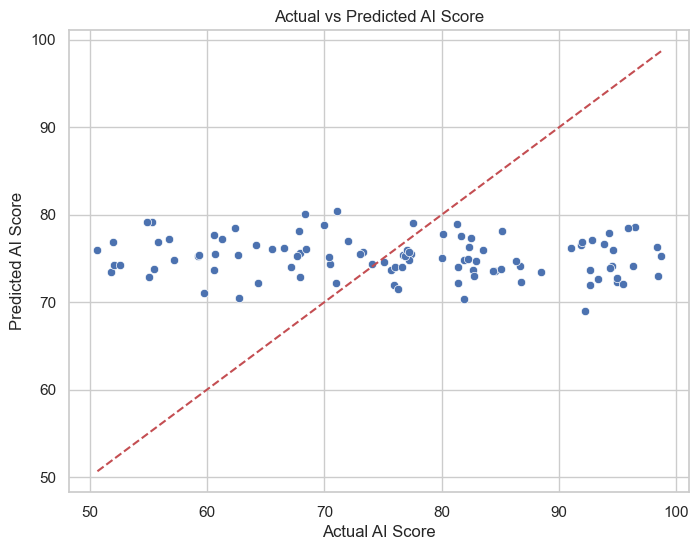

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=comparison_df['Actual AI Score'], y=comparison_df['Predicted AI Score'])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # خط المثالية
plt.xlabel("Actual AI Score")
plt.ylabel("Predicted AI Score")
plt.title("Actual vs Predicted AI Score")
plt.grid(True)
plt.show()


-----------------

* `Linear Regression`

In [31]:
Reg_model = LinearRegression()
Reg_model.fit(X_train_scaled, y_train)

# Predict and evalute
y_pred_train_reg = Reg_model.predict(X_train_scaled)
y_pred_test_reg = Reg_model.predict(X_test_scaled)

MSE_train_reg=mean_squared_error(y_train, y_pred_train_reg)
MSE_test_reg=mean_squared_error(y_test, y_pred_test_reg)

print(f'The MSE using Regression model for Training Dataset {MSE_train_reg}')
print(f'The MSE using Regression model for Testing Dataset {MSE_test_reg}')

The MSE using Regression model for Training Dataset 197.1565229229004
The MSE using Regression model for Testing Dataset 191.27701168250726


In [32]:
# Apply model prediction
y_pred = Reg_model.predict(X_test)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual AI Score': y_test.values,
    'Predicted AI Score': y_pred
})

# Optional: Calculate absolute error
comparison_df['Absolute Error'] = abs(comparison_df['Actual AI Score'] - comparison_df['Predicted AI Score'])

# Show top rows
print(comparison_df.head(10))

# Also you can sort by error to see worst predictions
print("\nTop Errors:")
print(comparison_df.sort_values(by='Absolute Error', ascending=False).head(5))


   Actual AI Score  Predicted AI Score  Absolute Error
0        55.458903           61.782656        6.323753
1        98.696892           71.309679       27.387213
2        82.700870           85.966032        3.265162
3        91.884121           54.755141       37.128980
4        92.839439           77.823508       15.015931
5        67.901422           70.586901        2.685479
6        74.032778           82.015728        7.982950
7        51.851734           92.292179       40.440444
8        77.340249           82.416027        5.075778
9        77.524017           80.012771        2.488755

Top Errors:
    Actual AI Score  Predicted AI Score  Absolute Error
91        52.023830          100.562124       48.538294
29        51.977717           93.830944       41.853227
7         51.851734           92.292179       40.440444
23        56.789259           96.655099       39.865840
60        59.223801           98.244223       39.020423


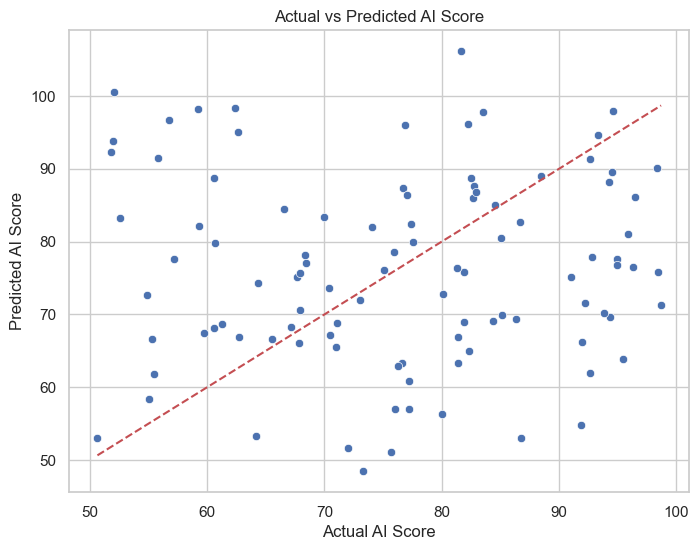

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=comparison_df['Actual AI Score'], y=comparison_df['Predicted AI Score'])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # خط المثالية
plt.xlabel("Actual AI Score")
plt.ylabel("Predicted AI Score")
plt.title("Actual vs Predicted AI Score")
plt.grid(True)
plt.show()


------------